In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.integrate as sc_i

In [11]:
N = 100 # resolution

# Set system properties.
t = np.linspace(0,10**-6,N) # time (s)

m = 10.*1.66054e-27 # mass (kg)
q = 5.0*1.602e-19 # charge (C)

Ex,Ey,Ez = 0.,0.,1.0e12 # electric field (N/C)
Bx,By,Bz = 0.,0.,1.0 # magnetic field (T)

x_0,y_0,z_0 = 0.,0.,0. # position (m)
vx_0,vy_0,vz_0 = 0.,0.,0. #velocity (m/s)

# Create initial array.
ini_arr = [x_0,y_0,z_0,vx_0,vy_0,vz_0]

# Create suvat function.
def g(ini_arr,t):
    '''
    Accepts a list of position (m) and velocity (m.s^-1) components in the form (x,y,z,vx,vy,vz) and a time
    t (s). Calculates acceleration (m.s^-2) components by the Lorentz force.  Returns an updated list of
    positions and velocities in the same form as inputted.
    '''
    # Input initial velocities.
    ux,uy,uz = ini_arr[3],ini_arr[4],ini_arr[5]
    
    # Calculate acceleration.
    u_cross_B = np.cross((ux,uy,uz),(Bx,By,Bz))
    ax,ay,az = (q/m)*(Ex+u_cross_B[0]),(q/m)*(Ey+uy*u_cross_B[1]),(q/m)*(Ez+uz*u_cross_B[2])
    
    # Calculate dispacement.
    sx,sy,sz = ux*t+0.5*ax*t**2,uy*t+0.5*ay*t**2,uz*t+0.5*az*t**2
    
    # Update position and velocity.
    x,y,z = ini_arr[0]+sx,ini_arr[1]+sy,ini_arr[2]+sz
    vx,vy,vz = ux+ax*t,uy+ay*t,uz+az*t
    
    return (x,y,z,vx,vy,vz)

In [17]:
# Initialise.
X,Y,Z = [x_0],[y_0],[z_0]
arr = ini_arr
delta_t = t[1]-t[0]

# Create dataset.
for n in range(N-1):
    #sc_i.odeint(
    arr = g(arr,delta_t)
    X.append(arr[0])
    Y.append(arr[1])
    Z.append(arr[2])

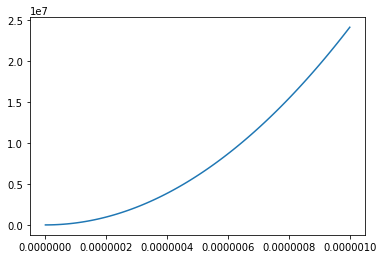

In [22]:
plt.plot(t,Z)
plt.show()

In [ ]:
ax = plt.axes(projection = '3d')